Resolutions from config: ('1000000:1Mb',)
Extracted resolution string: 1000000:1Mb
129


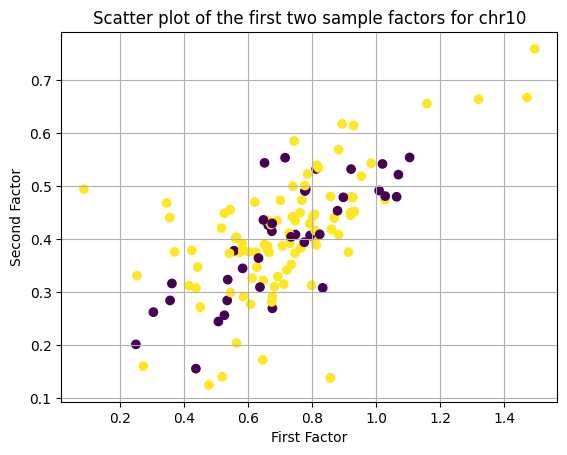

In [15]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import os
import sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
from config_and_print import filtered_list, chrom_file, resolutions, normalization

output_directory = '../../../projects/single_cell_files'

# Ensure resolutions is treated as a tuple or list of strings
if isinstance(resolutions, str):
    resolutions = (resolutions,)

print(f"Resolutions from config: {resolutions}")
resolution_str = resolutions[0]
print(f"Extracted resolution string: {resolution_str}")

def parse_resolution(resolution_str):
    if ':' in resolution_str:
        resolution_value, resolution_label = resolution_str.split(':')
        try:
            resolution = int(resolution_value)
            return resolution, resolution_label
        except ValueError:
            raise ValueError(f"Resolution value should be an integer: '{resolution_value}' in '{resolution_str}'")
    else:
        raise ValueError(f"Invalid resolution format: '{resolution_str}'. Expected format 'value:label', e.g., '1000000:1Mb'.")

resolution, label = parse_resolution(resolution_str)

import h5py
import matplotlib.pyplot as plt
import numpy as np



prefix_file_path = '../../../projects/single_cell_files/filtered_bam_list.txt'
# Read prefixes from the file
with open(prefix_file_path, 'r') as f:
    prefixes = [line.strip() for line in f] 

file_list = prefixes

chromosomes_info = {
    '1': 249250621,
    '2': 243199373,
    '3': 198022430,
    '4': 191154276,
    '5': 180915260,
    '6': 171115067,
    '7': 159138663,
    '8': 146364022,
    '9': 141213431,
    '10': 135534747,
    '11': 135006516,
    '12': 133851895,
    '13': 115169878,
    '14': 107349540,
    '15': 102531392,
    '16': 90354753,
    '17': 81195210,
    '18': 78077248,
    '19': 59128983,
    '20': 63025520,
    '21': 48129895,
    '22': 51304566,
}

########################################################################
# create the cell type dictionary
# [TO DO] This needs to be replaced with SNPS code 
########################################################################
# Define the path file with prefixes and colors in the following form
#1       sc1.ACTTGA      red
#2       sc1.GCCAAT      red
#3       sc1.TAGCTT      red
#4       sc10.TAGCTT     blue
#
filename = '../../../bin/name.order.HCG_methy.with_color.txt'

# Initialize an empty dictionary to store cell ID and color
cell_color_dict = {}

# Open and read the file
with open(filename, 'r') as file:
    for line in file:
        # Split the line into parts
        parts = line.strip().split()
        # Extract cell ID and color
        cell_id = parts[1]
        color = parts[2]
        # Store in dictionary
        cell_color_dict[cell_id] = color

# Define the path to the tensor sample order file
#This file contains the prefixes in the form
#sc11.ACTTGA
#sc11.CGATGT
#sc11.GCCAAT
#
tensor_order_filename = f'{output_directory}/filtered_bam_list.txt'

# Initialize a list to store the 1s and 0s
color_vector = []

# Open and read the tensor sample order file
with open(tensor_order_filename, 'r') as file:
    for line in file:
        sample_id = line.strip()  # Remove any trailing newlines or spaces
        if sample_id in cell_color_dict and cell_color_dict[sample_id] == 'red':
            color_vector.append(1)
        else:
            color_vector.append(0)

# Output the color vector to check
print(len(color_vector))

# Create a mapping dictionary
color_mapping = {
    'red': 'imr90',
    'blue': 'gm12878'
}

# Update the dictionary using the mapping
updated_cell_color_dict = {key: color_mapping[value] for key, value in cell_color_dict.items()}













chromosome = 'chr10'

# Specify the modality you want to load (modality 1 as an example)
modality = 1

# Define the file path to the sample factors
output_file_V_mod = f"{output_directory}/tensor_{label}_cell_type_single_modality_factors/{chromosome}_sample_factors_modality{modality}.h5"

# Define the dataset to load
output_dataset_V = '/sample_weights'

# Check if the file exists before attempting to load it
try:
    with h5py.File(output_file_V_mod, 'r') as f:
        # Load the sample factors
        V = f[output_dataset_V][:]
        
        # Check that V has at least two columns
        if V.shape[1] < 2:
            raise ValueError('The sample factors matrix does not have at least two columns.')
        
        # Scatter plot of the first two columns
        plt.scatter(V[2, :], V[3, :], c=color_vector, marker='o')
        plt.xlabel('First Factor')
        plt.ylabel('Second Factor')
        plt.title(f'Scatter plot of the first two sample factors for {chromosome}')
        plt.grid(True)
        plt.show()
except FileNotFoundError:
    print(f'File {output_file_V_mod} does not exist.')
except Exception as e:
    print(f'An error occurred: {str(e)}')
